<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_Dimensionality_Reduction_in_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
starting_time = time.time()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Hyperparameters List
RANDOM_STATE = 42
TEST_SIZE = 0.2
N_COMPONENTS = 11
RUN_HYPERPARAMETER_SEARCH = True

In [ ]:
df = pd.read_csv("/content/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA (Exploratory Data Analysis)

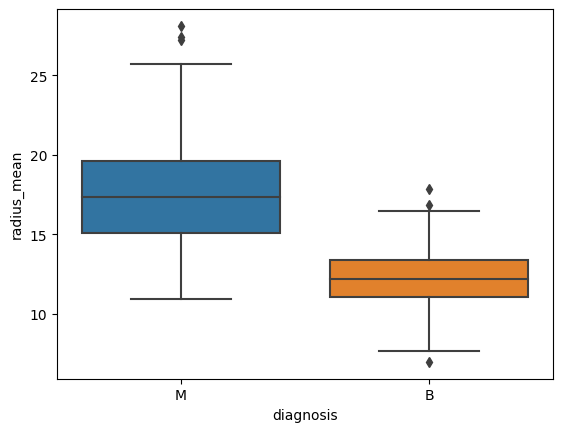

In [ ]:
ax = sns.boxplot(x = df["diagnosis"],
                 y = df["radius_mean"])

# Kesimpulan :
# Cell M cenderung memiliki radius mean yang lebih besar dibandingkan dengan Cell B

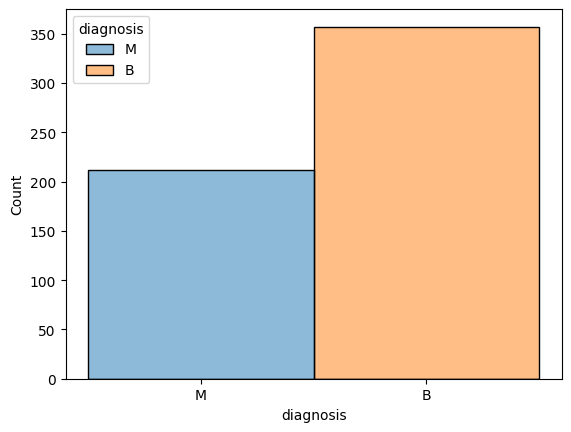

In [ ]:
ax = sns.histplot(x = df["diagnosis"],
                  hue = df["diagnosis"])

# Jumlah data Diagnosa B lebih banyak dari diagnosa M

# Data Preprocessing

Tahapan membersihkan data untuk disesuaikan ke proses selanjutnya

- Cek apakah ada data yang hilang
- Jika di kasus classification, cek apakah data target balance jika tidak bisa lakukan imbalance data handling
- Cek apakah ada data yang range/jangkauannya terlalu tinggi jika iya lakukan normalization
- cek apakah ada categorical data yang diperlukan untuk ke tahap modeling, jika ada lakukan konversi dengan One Hot Encoding / Label Encoding

In [ ]:
df.columns # Memunculkan semua kolom dataset yang ada

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Split data features dengan data target

#Data Target
y = df["diagnosis"].values

#Data Feature (Hanya ambil kolom dari radius_mean - fractal_dimension_se)
X = df.iloc[:, 2:22].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = TEST_SIZE,
                                                    random_state = RANDOM_STATE)

In [ ]:
from sklearn.preprocessing import StandardScaler

## Mengubah skala data pada features menjadi lebih minim, hanya dilakukan pada features tidak
# pada target
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
# fit_transform hanya dilakukan pada data features train

X_test = sc.transform(X_test)
#transform hanya dilakukan pada data features test dan data prediksi kedepannya

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = N_COMPONENTS) # Nanti PCA akan reduce/mengurangi dimensi dataset
# menjadi jumlah N_COMPONENTS

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Modeling

## Logistic Regression

In [ ]:
model_lg = LogisticRegression()

model_lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred_lg = model_lg.predict(X_test)

## Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier(random_state = RANDOM_STATE)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred_dt = model_dt.predict(X_test)

## Random Forest

In [ ]:
model_rf = RandomForestClassifier(random_state = RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_rf = model_rf.predict(X_test)

## SVM

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
pred_svm = model_svm.predict(X_test)

## Model Performance Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(pred_lg, y_test))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        70
           M       0.98      0.95      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
print(classification_report(pred_dt, y_test))

              precision    recall  f1-score   support

           B       0.87      0.93      0.90        67
           M       0.88      0.81      0.84        47

    accuracy                           0.88       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [ ]:
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

           B       0.97      0.95      0.96        73
           M       0.91      0.95      0.93        41

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        73
           M       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



# Hyperparameter Tuning

Hyperparameter vs Parameter dalam Machine Learning
Hyperparameter : Variable yang diset diawal sebelum di train ke model
Misalkan : Jumlah components pada PCA dan jumlah pohon pada Random Forest

parameter : variable yang didapatkan dari hasil training model yang dijadikan rumus untuk prediksi ke depannya

Misalkan : y = ax + b


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

if RUN_HYPERPARAMETER_SEARCH:
    start_time_search = time.time()

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 42)
    pca_hyperparameter_tuning = PCA()
    rf_hyperparameter_tuning = RandomForestClassifier()

    pipeline = Pipeline(steps = [('pca', pca_hyperparameter_tuning),
                                 ('rf', rf_hyperparameter_tuning)])
    parameter_grid = {
        'pca__n_components' : [i for i in range(3, 21)], # dari 3 sampai 20 components
        'rf__n_estimators' : [i*100 for i in range(1, 6)] # kelipatan 100 dari 100-500
    }

    grid_search = GridSearchCV(pipeline,
                               parameter_grid,
                               cv = 5)
    # Tahapan pencarian hyperparameter terbaik
    grid_search.fit(X_train, y_train)
    print("Best Parameters : {}".format(grid_search.best_params_))
    end_time = time.time()
    print("waktu pencarian : {}".format(end_time - start_time_search))

Best Parameters : {'pca__n_components': 12, 'rf__n_estimators': 100}
waktu pencarian : 200.5839765071869
